Seaborn

Задание 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Установите (любой на ваш вкус) общий стиль графиков на весь ноутбук используя функцию set_style

In [3]:
sns.set_style('whitegrid')

Задание 2
Подгрузите данные datatraining.txt при помощи соответствующей функции библиотеки Pandas. Преобразуйте индекс в datetime index, удалите столбец с датой. Постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец Occupancy)

P.S. используйте функцию sns.pairplot c параметром hue

In [4]:
import pandas as pd

In [5]:
dt = pd.read_csv('datatraining.txt', encoding="cp1252")

In [6]:
dt.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
dt.index = pd.to_datetime(dt.date)
dt.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [8]:
dt1 = dt.copy()


In [12]:
dt1.drop(labels = ['date'], axis = 1, inplace = True)

In [13]:
dt1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<Figure size 800x500 with 0 Axes>

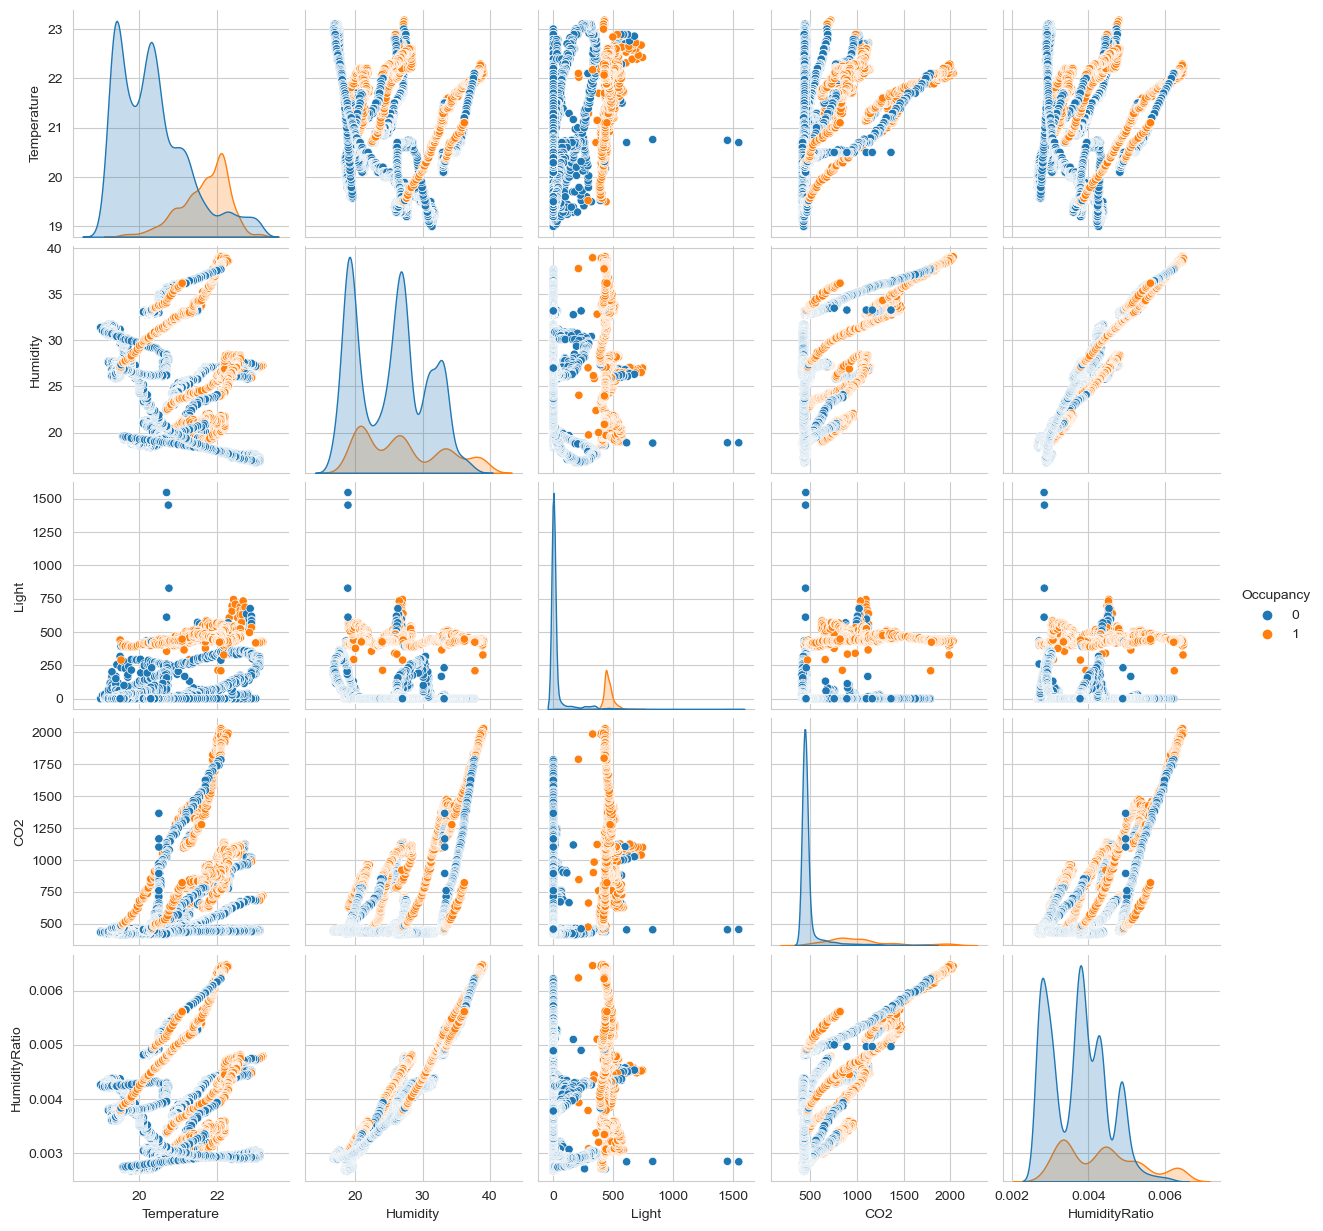

In [14]:
plt.figure(figsize = (8, 5))
sns.pairplot(data = dt1, hue= 'Occupancy')

Задание 3

Постройте boxplot всех признаков.

P.S. график должен быть читаемым, т.е.

отрегулируйте размер графика
предварительно "отскейлите" все числовые признаки, т.е. приведите к стандартному нормальному распределению при помощи функции ниже (Occupancy скейлить не надо (!))

In [15]:
def scale(data):
    return (data - data.mean()) / data.std()

In [16]:
dt1[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']] = dt1[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].apply(scale, 
                                                                  axis = 0)

In [17]:
dt1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,2.518315,0.278509,1.573666,0.364926,1.091690,1
2015-02-04 17:51:59,2.488814,0.277696,1.591637,0.341860,1.080489,1
2015-02-04 17:53:00,2.488814,0.273628,1.573666,0.340269,1.075822,1
2015-02-04 17:54:00,2.488814,0.265492,1.573666,0.323567,1.066489,1
2015-02-04 17:55:00,2.439646,0.265492,1.573666,0.311636,1.049458,1


<AxesSubplot:>

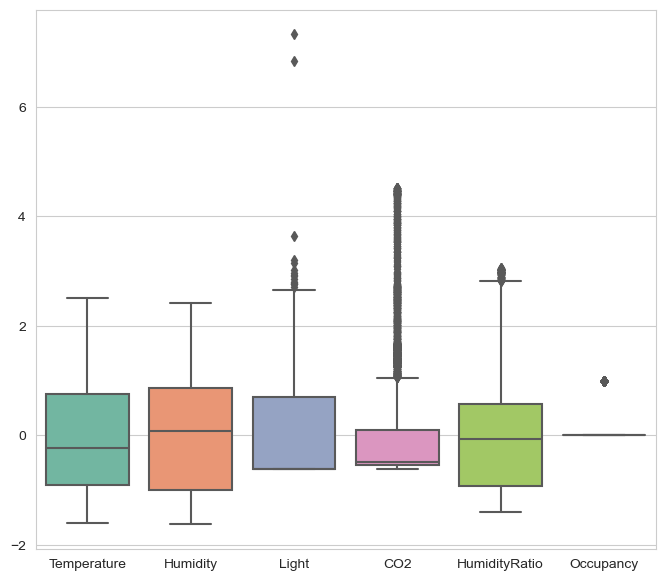

In [18]:
plt.figure(figsize = (8, 7))
sns.boxplot(data = dt1, palette = 'Set2')

Задание 4

Постройте violinplot всех признаков

P.S. Предварительно приведите их к стандартному нормальному распределению как мы делали в предыдущей задаче

<AxesSubplot:>

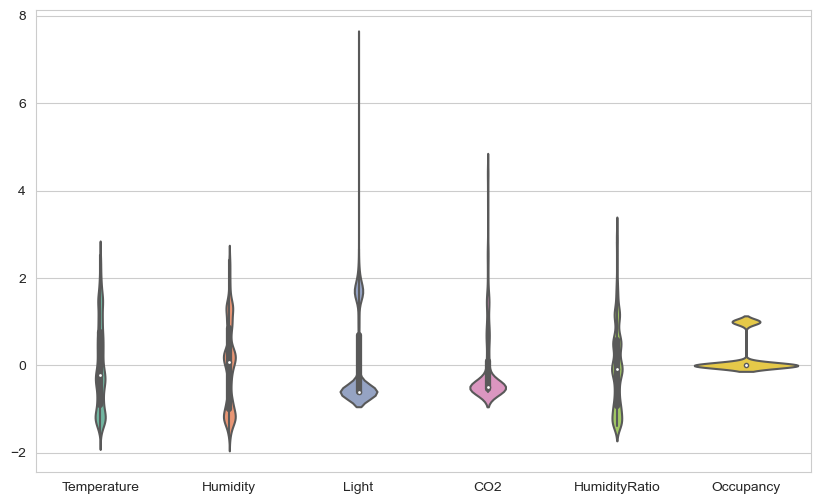

In [25]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dt1, palette = 'Set2')

Задание 5

Нарисуйте heatmap матрицы корреляций. Отрегулируйте масштаб, подберите подходящую палитру

In [26]:
import seaborn as sb
import matplotlib.pyplot as plt

In [27]:
dt2=dt.copy()

In [28]:
dt2.drop(labels = ['date'], axis = 1, inplace = True)

In [29]:
dt2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [31]:
dt2corr=dt2.corr()

<AxesSubplot:>

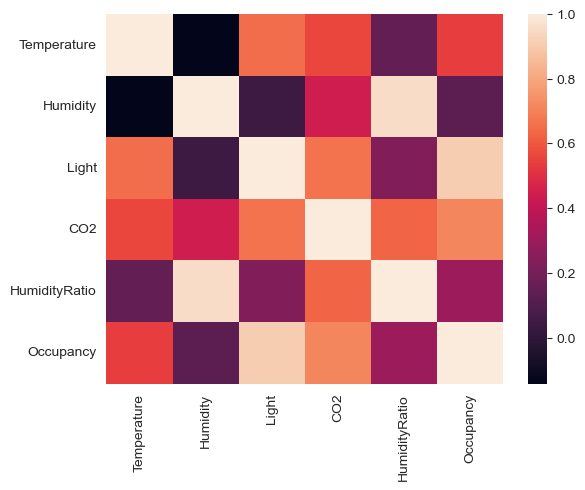

In [33]:
sb.heatmap(dt2corr)